In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
#loading the training dataset
df1 = pd.read_csv('/content/drive/MyDrive/dataset/train_data.csv')

In [3]:
df1.shape

(7160, 14)

The dataset has 7160 rows and 14 columns

In [4]:
#displaying the columns in the dataset
df1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [5]:
#viewing the first five rows of the dataset
df1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


This shows that the dataset has 7160 rows

In [6]:
#displaying the datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


This shows that out of the 14 columns, 3 contains float datatype, 4 has integer and 7 columns conatin strings as a datatype and that means there need for encoding the categorical variables

In [7]:
#displaying basic key statistics
df1.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [8]:
#displaying basic key statistics
df1.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7153,7160,7160,7058
unique,7160,2,2,2,2,11,1307
top,H14663,V,N,O,R,.,6088
freq,1,5382,3608,3602,3610,3551,143


In [9]:
#checking for missing values in the dataset
df1.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

The variable Garden has 7 missing values, Building Dimension has 106, Date_of_occupancy has 508 and Geo_code has 102 missing values.


In [10]:
#Handling the missing values using imputation since the dataset is small
df1 = df1
df1['Building Dimension']=df1['Building Dimension'].fillna(df1['Building Dimension'].median())
df1['Date_of_Occupancy']=df1['Date_of_Occupancy'].fillna(df1['Date_of_Occupancy'].median())
df1['Garden']=df1['Garden'].fillna(df1['Garden'].mode().iloc[0])
df1['Geo_Code']=df1['Geo_Code'].fillna(df1['Geo_Code'].mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


This shows that all the missing values have been handled since all variables have total count of 7160

In [11]:
import matplotlib.pyplot as plt
import plotly.express as px



Distribution of the data

In [12]:
df1.columns


Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [13]:
df1['Building Dimension'].describe()

count     7160.000000
mean      1871.873184
std       2263.296186
min          1.000000
25%        531.500000
50%       1083.000000
75%       2250.000000
max      20940.000000
Name: Building Dimension, dtype: float64

In [14]:
#Removing outlier
upper_limit = df1['Building Dimension'].mean() + 0.7*df1['Building Dimension'].std()
lower_limit = df1['Building Dimension'].mean() - 0.7*df1['Building Dimension'].std()

In [15]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 3456.1805144593
Lower_limit: 287.56585425578396


Text(0, 0.5, 'Frequency')

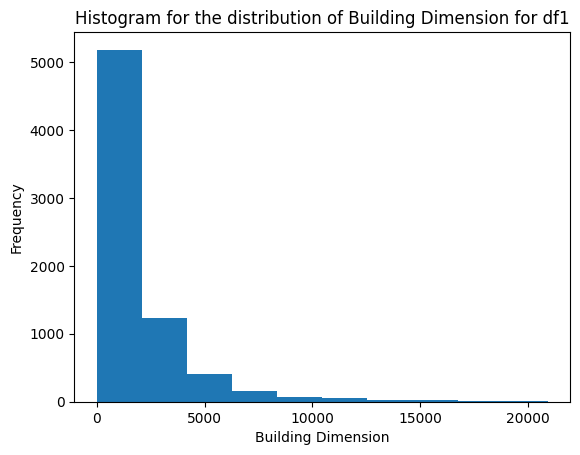

In [16]:
plt.hist(df1['Building Dimension'])
plt.title('Histogram for the distribution of Building Dimension for df1')
plt.xlabel('Building Dimension')
plt.ylabel('Frequency')

In [17]:
dff1=df1.loc[(df1['Building Dimension']<upper_limit) & (df1['Building Dimension']>lower_limit)]
dff1['Building Dimension'].describe()

count    5626.000000
mean     1213.880732
std       802.080650
min       288.000000
25%       550.000000
50%       986.500000
75%      1700.000000
max      3455.000000
Name: Building Dimension, dtype: float64

Text(0, 0.5, 'Frequency')

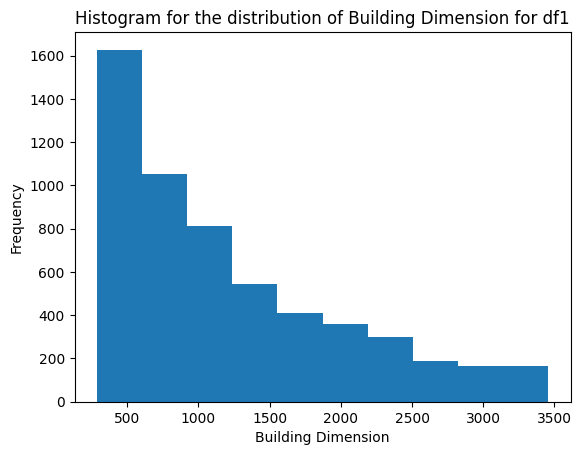

In [18]:
plt.hist(dff1['Building Dimension'])
plt.title('Histogram for the distribution of Building Dimension for df1')
plt.xlabel('Building Dimension')
plt.ylabel('Frequency')

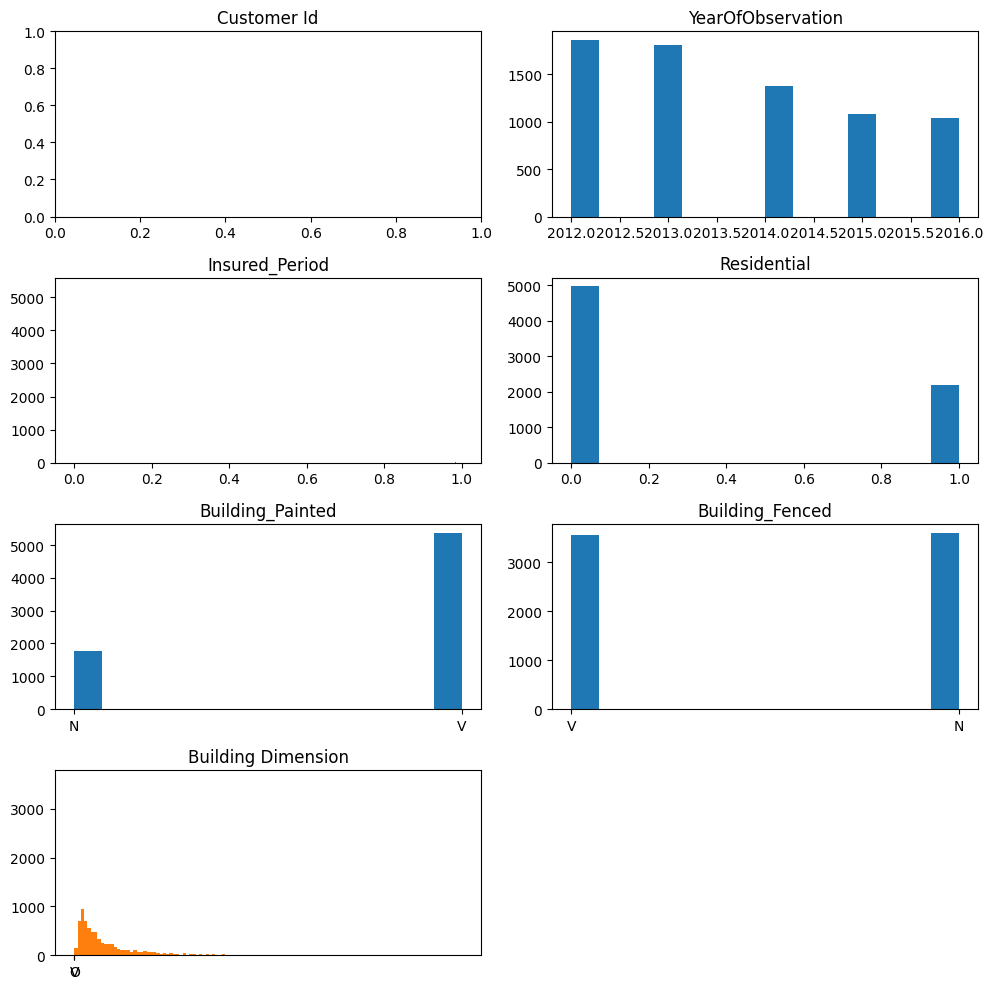

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
#data = fetch_california_housing(as_frame=True)
#df1 = df1['data']
#df['MedHouseVal'] = data['target']

# Create a 4x2 grid of subplots
fig, ax = plt.subplots(4, 2,figsize=(10, 10))

# Plot histograms on each subplot
#ax[0, 0].hist(df1['Customer Id'], bins="auto")
ax[0, 1].hist(df1['YearOfObservation'], bins="auto")
ax[1, 0].hist(df1['Insured_Period'], bins="auto")
ax[1, 1].hist(df1['Residential'], bins="auto")
ax[2, 0].hist(df1['Building_Painted'], bins="auto")
ax[2, 1].hist(df1['Building_Fenced'], bins="auto")
ax[3, 0].hist(df1['Garden'], bins="auto")
ax[3, 0].hist(df1['Building Dimension'], bins="auto")

# Set titles for each subplot
ax[0, 0].set_title('Customer Id')
ax[0, 1].set_title('YearOfObservation')
ax[1, 0].set_title('Insured_Period')
ax[1, 1].set_title('Residential')
ax[2, 0].set_title('Building_Painted')
ax[2, 1].set_title('Building_Fenced')
ax[3, 0].set_title('Garden')
ax[3, 0].set_title('Building Dimension')


# Remove the empty subplot in the last row and last column
fig.delaxes(ax[3, 1])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Distribution od Residential')

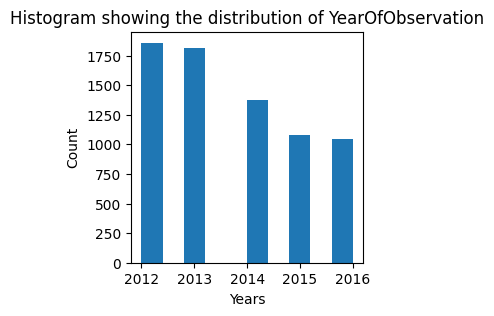

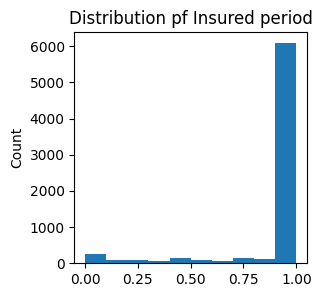

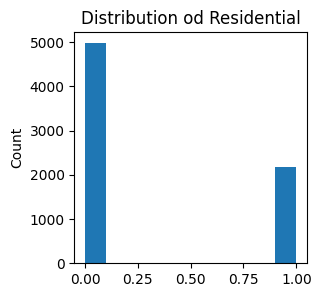

In [20]:
plt.figure(figsize=(3,3))
plt.hist(df1["YearOfObservation"])
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Histogram showing the distribution of YearOfObservation")

plt.figure(figsize=(3,3))
plt.hist(df1["Insured_Period"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Distribution pf Insured period")

plt.figure(figsize=(3,3))
plt.hist(df1["Residential"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Distribution od Residential")

In [21]:
# Count the occurrences of Attrition
df1["Claim"].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

Text(0.5, 1.0, 'A bar graph showing the distribution of claim')

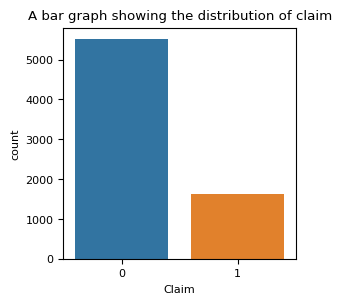

In [22]:
plt.figure(figsize=(3,3))
plt.rc("font",size=8)
sns.countplot(x='Claim',data=df1)
plt.title("A bar graph showing the distribution of claim")

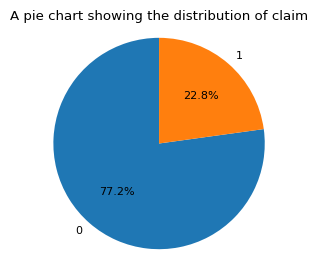

In [23]:
# Create a pie chart for attrition
claim_counts = df1["Claim"].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(claim_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('A pie chart showing the distribution of claim')
plt.show()

This means 22.8% of the building has atleast one claim over the insured period and 77.2% has no claim over the insured period.

In [24]:
df1["Building_Painted"].value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

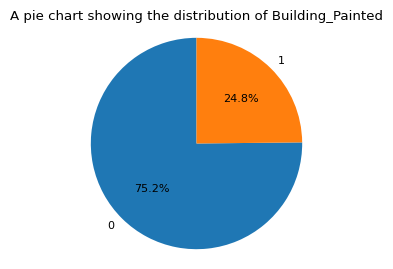

In [25]:
df1["Building_Painted"].value_counts()
Building_Painted_counts = df1["Building_Painted"].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(Building_Painted_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('A pie chart showing the distribution of Building_Painted')
plt.show()


In [26]:
df1["Building_Fenced"].value_counts()

N    3608
V    3552
Name: Building_Fenced, dtype: int64

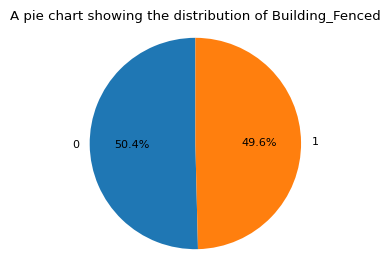

In [27]:
df1["Building_Fenced"].value_counts()
Building_Fenced_counts = df1["Building_Fenced"].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(Building_Fenced_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('A pie chart showing the distribution of Building_Fenced')
plt.show()


In [28]:
df1["Garden"].value_counts()

O    3609
V    3551
Name: Garden, dtype: int64

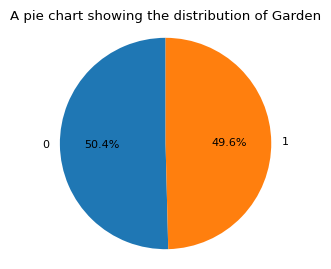

In [29]:
df1["Garden"].value_counts()
Garden_counts = df1["Garden"].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(Garden_counts, labels=claim_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('A pie chart showing the distribution of Garden')
plt.show()

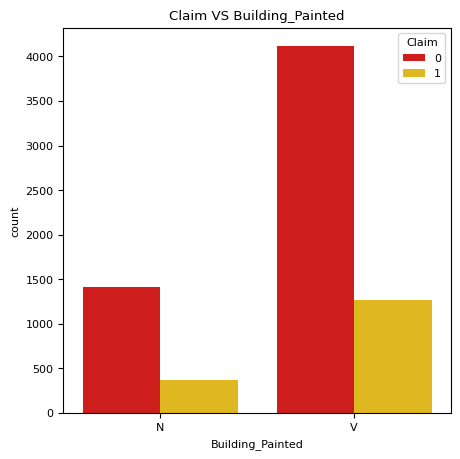

In [30]:
## Claim with respect to Building_Painted
plt.figure(figsize=(5,5))
sns.countplot(x='Building_Painted',hue='Claim',data=df1, palette='hot')
plt.title( 'Claim VS Building_Painted')
plt.show()

In [31]:
df1.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

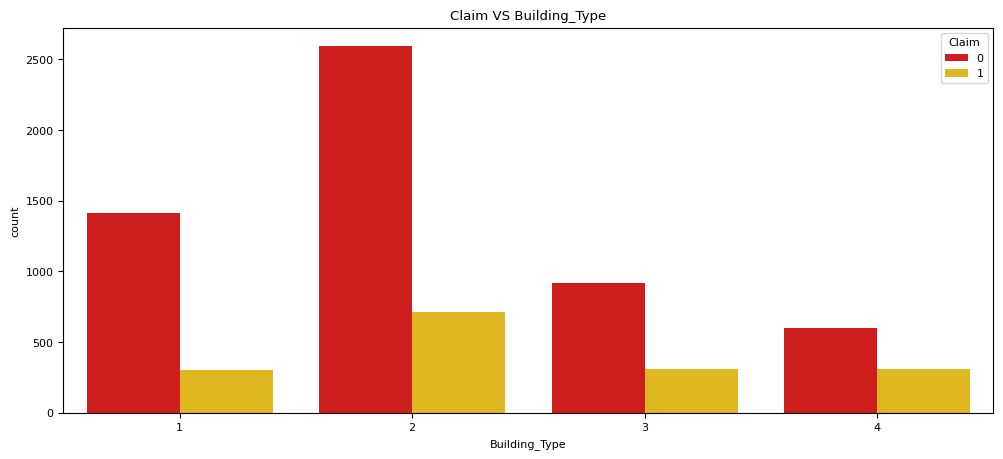

In [32]:
## Claim with respect to Building_Type
plt.figure(figsize=(12,5))
sns.countplot(x='Building_Type',hue='Claim',data=df1, palette='hot')
plt.title( 'Claim VS Building_Type')
plt.show()

In [33]:
columns_to_drop = ['Customer Id','NumberOfWindows','Geo_Code']
df1 = df1.drop(columns=columns_to_drop, axis=1)

In [34]:
df1.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

Binary Encoding

In [35]:
#data["Customer Id"] = data["Customer Id"].map({"No": 0, "Yes": 1})
df1["Building_Painted"] = df1["Building_Painted"].map({"N": 0, "V": 1})
df1["Building_Fenced"] =df1["Building_Fenced"].map({"N": 0, "V": 1})
df1["Garden"] = df1["Garden"].map({"V": 0, "O": 1})
df1["Settlement"] = df1["Settlement"].map({"U": 0, "R": 1})
#data["NumberOfWindows"] = data["NumberOfWindows"].map({"No": 0, "Yes": 1})
#data["Geo_Code"] = data["Geo_Code"].map({"No": 0, "Yes": 1})

In [36]:
df1.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,0,1,0,0,290.0,1,1960.0,0
1,2015,1.0,0,1,0,1,1,490.0,1,1850.0,0
2,2014,1.0,0,0,1,0,0,595.0,1,1960.0,0
3,2013,1.0,0,1,1,0,0,2840.0,1,1960.0,0
4,2014,1.0,0,1,0,1,1,680.0,1,1800.0,0


Feature selection

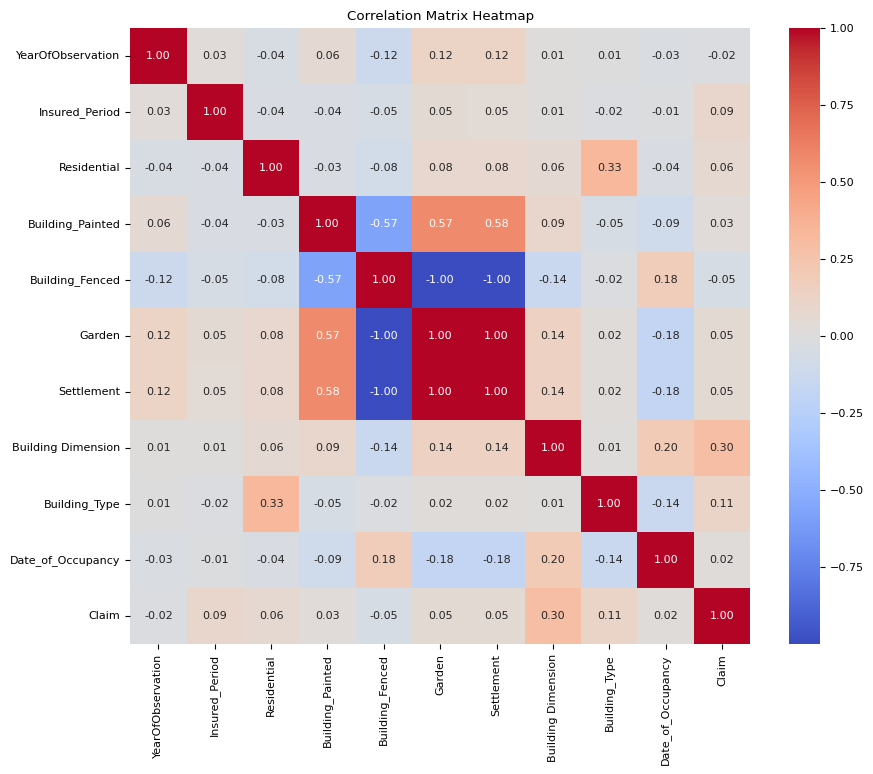

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [38]:
target_variable = 'Claim'
correlation_with_target = correlation_matrix[target_variable]
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print(sorted_correlation)

Claim                 1.000000
Building Dimension    0.295558
Building_Type         0.112168
Insured_Period        0.088715
Residential           0.063509
Garden                0.052171
Settlement            0.052019
Building_Fenced       0.051657
Building_Painted      0.029857
Date_of_Occupancy     0.017781
YearOfObservation     0.016367
Name: Claim, dtype: float64


Building Dimension is a feature of high importance, It has a positive correlation, this means that as the 'Building Dimension' increases, the likelihood of a claim being made also increases.

Handling the test dataset

In [39]:
import pandas as pd
import seaborn as sns
#loading the test dataset
df2 = pd.read_csv('/content/drive/MyDrive/dataset/test_data.csv')

In [40]:
#displaying the columns in the dataset
df2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [41]:
#displaying the first five rows
df2.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [42]:
#determining the dimension of the dataset
df2.shape

(3069, 13)

This shows that the test dataset has 3069 rows and 13 columns

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


This shows that out of the 13 columns, 3 columns have float datatype, 3 hae integer datatype and 7 columns have a string datatype.

In [44]:
df2.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [45]:
df2.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,3069,3069,3069,3065,3069,3069,3056
unique,3069,2,2,2,2,11,697
top,H11920,V,V,V,U,.,6083
freq,1,1684,2240,2240,2240,2240,113


In [46]:
#checking for missing values in the dataset
df2.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [47]:
#Handling the missing values using imputation since the dataset is small
df2 = df2
df2['Building Dimension']=df2['Building Dimension'].fillna(df2['Building Dimension'].median())
df2['Date_of_Occupancy']=df2['Date_of_Occupancy'].fillna(df2['Date_of_Occupancy'].median())
df2['Garden']=df2['Garden'].fillna(df2['Garden'].mode().iloc[0])
df2['Geo_Code']=df2['Geo_Code'].fillna(df2['Geo_Code'].mode().iloc[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3069 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3069 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   3069 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [48]:
columns_to_drop = ['Customer Id','NumberOfWindows','Geo_Code']
df2 = df2.drop(columns=columns_to_drop, axis=1)

In [49]:
df2.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

Binary Encoding

In [50]:
df2["Building_Painted"] = df2["Building_Painted"].map({"N": 0, "V": 1})
df2["Building_Fenced"] =df2["Building_Fenced"].map({"N": 0, "V": 1})
df2["Garden"] =df2["Garden"].map({"V": 0, "O": 1})
df2["Settlement"] =df2["Settlement"].map({"U": 0, "R": 1})


In [51]:
df2.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,2013,1.000000,0,1,0,1,1,300.0,1,1960.0
1,2016,0.997268,0,1,0,1,1,300.0,1,1960.0
2,2013,0.369863,0,1,1,0,0,790.0,1,1960.0
3,2014,1.000000,0,1,0,1,1,1405.0,1,2004.0
4,2016,1.000000,0,1,0,1,1,1405.0,1,2004.0


In [52]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X = scaler.fit_transform(X)


Model Building


Splitting the training dataset

In [53]:
#splitting the dataset
from sklearn.model_selection import train_test_split

# Assuming df1 is your DataFrame
features = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']
target = "Claim"

X = df1[features]
y = df1[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM Model

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
#print("Accuracy:", accuracy)
# Evaluating the SVM model using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1098
           1       0.58      0.10      0.16       334

    accuracy                           0.77      1432
   macro avg       0.68      0.54      0.52      1432
weighted avg       0.73      0.77      0.70      1432



In [55]:
# Evaluating the model's performance using a confusion matrix
cm_svm = confusion_matrix(y_test,predictions)
print(cm_svm)
accuracy_score(y_test, predictions)

[[1075   23]
 [ 302   32]]


0.7730446927374302

<Axes: >

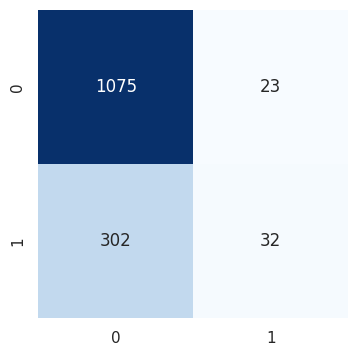

In [56]:
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)

<Figure size 500x400 with 0 Axes>

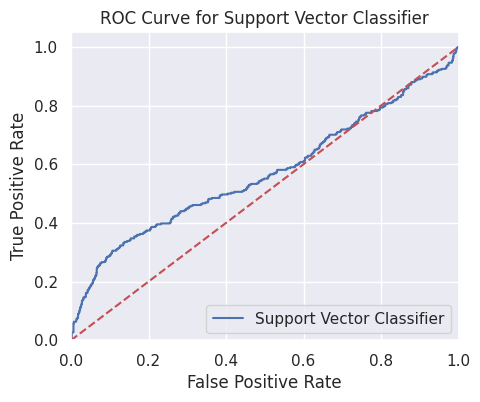

In [57]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
svm = SVC(probability=True)

# Train the model
svm.fit(X_train, y_train)

# Visualize the ROC curve
plt.figure(figsize=(5, 4))
# Use decision_function to get decision values
y_decision = svm.decision_function(X_test)

# Manually compute probabilities using decision values
y_pred_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
nb_roc_auc2=roc_auc_score(y_test,svm.predict(X_test))
plt.plot(fpr, tpr, label='Support Vector Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Linear regression

In [58]:
#creating a model
from sklearn.linear_model import LinearRegression
# creating a object
regressor = LinearRegression()
#training the model
regressor.fit(X, y)
#using the training dataset for the prediction
pred = regressor.predict(X)
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
#plt.plot(X, pred, color = 'Black', marker = 'o')
#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_)

Mean Squared Error :  0.1569254338157841
R-Squared : 0.10904360428276305
Y-intercept : 13.479539557486305
Slope : [-6.85011445e-03  1.56611719e-01  1.35574951e-02  1.41972633e-02
  7.88744722e-01  8.84797652e-01 -1.01499929e-01  5.52320519e-05
  4.62146311e-02 -3.08044525e-04]


Hyperparameter tunning

In [59]:
lr_model = LinearRegression()

# Define the hyperparameters and their possible values to search
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Initialize GridSearchCV with the Linear Regression model and parameter grid
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y, pred)
print("Mean Squared Error:", mse)
print("R-Squared :" , r2)

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Mean Squared Error: 0.15935084705865585
R-Squared : 0.10904360428276305



KNN Model



In [60]:
from sklearn.neighbors import KNeighborsClassifier
# Create the K-nearest Neighbours Classifier and use the train dataset to train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#predicting the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Evaluating the K-nearest Neighbours model using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1098
           1       0.38      0.26      0.31       334

    accuracy                           0.73      1432
   macro avg       0.59      0.57      0.57      1432
weighted avg       0.70      0.73      0.71      1432



In [61]:
# Evaluating the model's performance using a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
accuracy_score(y_test, y_pred)

[[959 139]
 [248  86]]


0.7297486033519553

<Axes: >

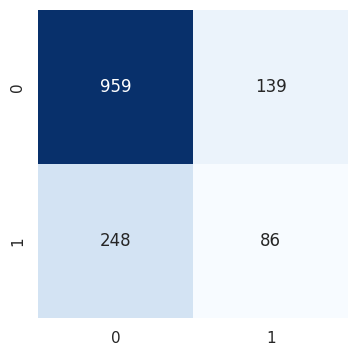

In [62]:
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)

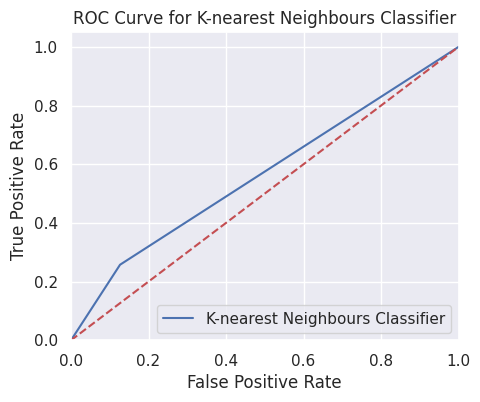

In [63]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_pred_= knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score_knn = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='K-nearest Neighbours Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for K-nearest Neighbours Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [64]:
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
#best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test.iloc[6]])

In [71]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(classification_report(y_test,y_pred))

#print("Accuracy:", accuray)
#print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1098
           1       0.56      0.24      0.33       334

    accuracy                           0.78      1432
   macro avg       0.68      0.59      0.60      1432
weighted avg       0.75      0.78      0.74      1432



In [ ]:
# Evaluating the model's performance using a confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

<Axes: >

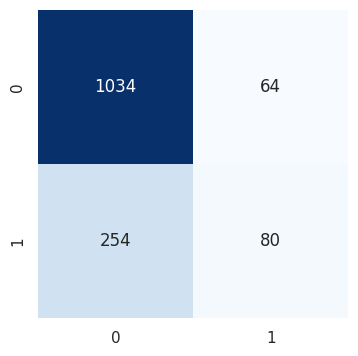

In [73]:
# Evaluating the model's performance using a heatmap using the confusion matrix scores
sns.set (rc = {'figure.figsize':(4, 4)})
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)

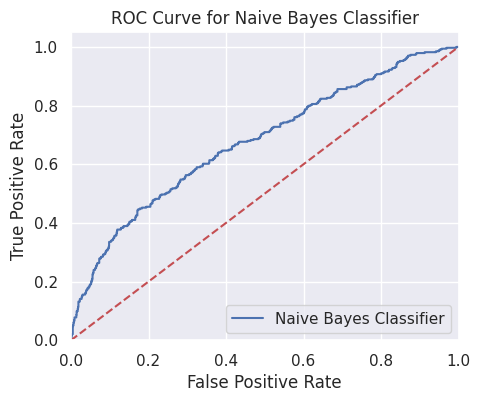

In [74]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
nb_roc_auc2=roc_auc_score(y_test,model.predict(X_test))
plt.plot(fpr, tpr, label='Naive Bayes Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [76]:
# Save the predictions to a CSV file
output_df1.to_csv('predictions_output.csv', index=False)



NameError: ignored

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Linear Regression', 'KNN','Naive Bayes'],
   'Score': [acc_svc,  rmse, acc_knn ,acc_gaussian]})
models.sort_values(by='Score', ascending=False)



NameError: ignored